<a href="https://colab.research.google.com/github/KFurudate/Midoribon/blob/main/chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第3章 一般線形モデル(GLM) -ポアソン回帰-

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [4]:
data_dir = "/content/drive/My Drive/Midoribon/input/"
data =  pd.read_csv(os.path.join(data_dir, 'chap3_data.csv'))

In [5]:
print(len(data))
data.head()

100


,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [6]:
data.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


In [7]:
print(data.f)

0     C
1     C
2     C
3     C
4     C
     ..
95    T
96    T
97    T
98    T
99    T
Name: f, Length: 100, dtype: object


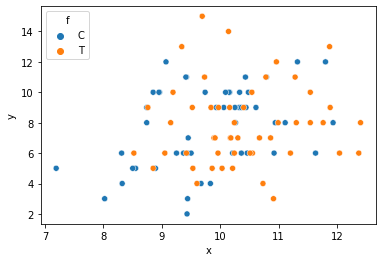

In [20]:
sns.scatterplot(x='x', y='y', hue='f', data=data)
plt.show()

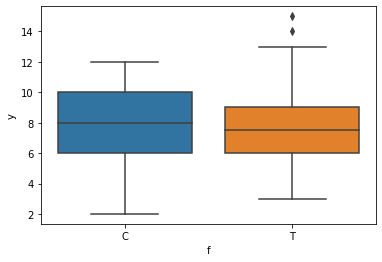

In [24]:
sns.boxplot(x='f', y='y', data=data)
plt.show()

### ポアソン回帰の統計モデル

ポアソン回帰とは、観測データにポアソン分布を使った統計モデルをあてはめ（fitting)、対数尤度が最大になるパラメーターの推定量を決めること。


個体iの体サイズ xi に依存する統計モデル。
説明変数はxi、応答変数は*yi*である。

ある個体iにおいて、種子数が*yi*である確率 *Pr(yi | λi)* はポアソン分布にしたがっていると仮定する。

ある個体iの平均種子数 *λi* が

*λi* = exp(β1+ β2*xi*)

とすると、β1(intercept)やβ2(slope)をパラメーターとよぶ(coefficentとよぶ場合もある)。


In [28]:
# 切片β1lと 傾きβ2の最尤推定値
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.glm('y ~ x', data=data, family=sm.families.Poisson())

In [29]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Sat, 03 Oct 2020   Deviance:                       84.993
Time:                        19:26:33   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [35]:
# Parameter(coefficent)
# intercept
β1 = 1.2917

# slope
β2 = 0.0757

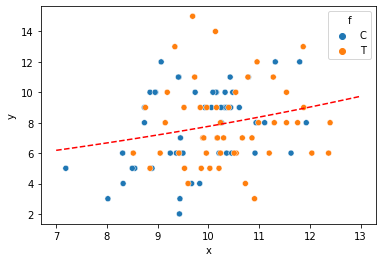

In [40]:
sns.scatterplot(x='x', y='y', hue='f', data=data)

# ポアソン回帰モデルによる平均種子数λiの予測 
# λi = exp(β1+ β2xi)
x = np.linspace(7, 13)
y = np.exp(β1 + x*β2)
plt.plot(x, y, "r--")

plt.show()

説明変数にカテゴリカル変数*fi*を同時に組み込んだ統計モデル。

*λi = exp(β1 + β2xi + β3di)*

diはカテゴリカル変数*fi*をダミー変数化したもの。


In [105]:
#対数リンク関数(logλi = β1 + β2xi + β3di) を選択
link = sm.genmod.families.links.log
model = smf.glm('y ~ x + f', data=data, family=sm.families.Poisson(link=link))
result = model.fit()
result.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Sat, 03 Oct 2020   Deviance:                       84.808
Time:                        20:43:00   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
f[T.T]        -0.0320      0.074     -0.430      0.667      -0.178       0.114
x              0.0801      0.037      2.162      0.031       0.007       0.153
==============================================================================
"""

In [106]:
# Parameter(coefficent)
# intercept
β1 = 1.2631

# slope
β2 = 0.0801

# f
β3 = -0.0320

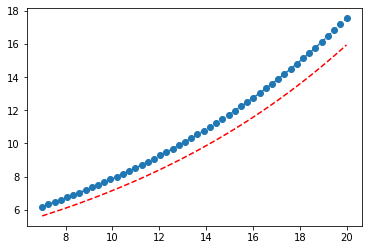

In [108]:
# ポアソン回帰モデルによる平均種子数λiの予測 
# λi = exp(β1+ β2xi + β3di)
x = np.linspace(7, 20)
y = np.exp(β1 + x*β2 + 3*β3)
plt.plot(x, y, "r--")

y = np.exp(β1 + x*β2)
plt.plot(x, y, "o--")

plt.show()

In [109]:
# 恒等リンク関数
link = sm.genmod.families.links.identity
model = smf.glm('y ~ x + f', data=data, family=sm.families.Poisson(link=link))
result = model.fit()
result.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:               identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.16
Date:                Sat, 03 Oct 2020   Deviance:                       84.538
Time:                        20:44:48   Pearson chi2:                     83.6
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2671      2.843      0.446      0.656      -4.306       6.840
f[T.T]        -0.2048      0.582     -0.352      0.725      -1.346       0.936
x              0.6606      0.290      2.281      0.023       0.093       1.228
==============================================================================
"""

In [111]:
# Parameter(coefficent)
# intercept
β1 = 1.2671

# slope
β2 = 0.6606

# f
β3 = -0.2048

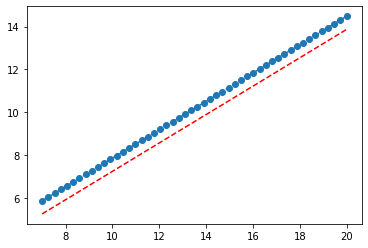

In [114]:
# ポアソン回帰モデルによる平均種子数λiの予測 
# λi = β1+ β2xi + β3di
x = np.linspace(7, 20)
y = β1 + x*β2 + 3*β3
plt.plot(x, y, "r--")

y = β1 + x*β2
plt.plot(x, y, "o--")

plt.show()